#### Задача 4.2

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from math import sqrt

%matplotlib inline

In [112]:
def RandomParameter():
    return sps.uniform.rvs(loc = 0.1, scale = 0.4)

### Биномиальное распределение

In [113]:
N = 1000
K = 500 #количество бутстрепных выборок

m = 50
p_random = RandomParameter()
print("p = ", p_random)

#генерируем выборку
sample = sps.binom.rvs(m, p_random, size=N)

#считаем оценку по выборке
effective_est = np.array([sample[:i].mean() / m for i in range(1, N + 1)])

var_but_eff_est = np.zeros(N) #бутстрепные оценки дисперсии для эфф. оценки
var_but_other_est = np.zeros(N) #бутстрепные оценки дисперсии для X_1 / m

for i in range(0, N):
    tmp_eff_est = np.zeros(K)
    tmp_other_est = np.zeros(K)
    
    for j in range(0, K):
        #параметрическая бутстрепная выборка
        sample_but_eff = sps.binom.rvs(m, effective_est[i], size=i + 1)
        sample_but_other = sps.binom.rvs(m, sample[0] / m, size=i + 1)
        #оценка для нее
        tmp_eff_est[j] = sample_but_eff.mean() / m
        tmp_other_est[j] =  sample_but_other[0] / m
        
    #бутстрепная оценка дисперсии
    var_but_eff_est[i] = tmp_eff_est.var()
    var_but_other_est[i] = tmp_other_est.var()

#информация Фишера
fisher = np.array([p_random * (1 - p_random) / (i * m) 
                    for i in range(1, N + 1)])

p =  0.306824777258


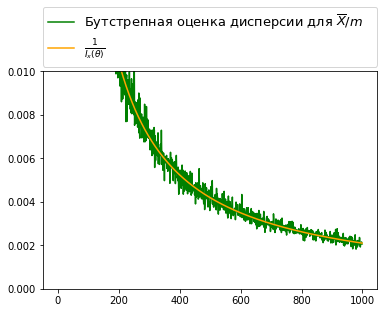

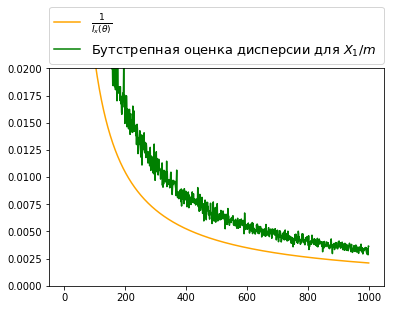

In [131]:
plt.figure()
plt.ylim(0, 0.01)
plt.plot(var_but_eff_est, color='green', 
         label="Бутстрепная оценка дисперсии для $\overline{X} / m$")
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

plt.figure()
plt.ylim(0, 0.02)
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.plot(var_but_other_est, color='green', 
         label="Бутстрепная оценка дисперсии для $X_1 / m$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

### Экспоненциальное распределение

In [115]:
N = 1000
K = 500

p_random = RandomParameter()
print("p = ", p_random)

sample = sps.expon.rvs(scale=(1 / p_random), size=N)

effective_est = np.array([sample[:i].mean() for i in range(1, N + 1)])
other_est = np.array([ (i - 1) / sample[:i].mean() for i in range(1, N + 1)])

var_but_eff_est = np.zeros(N)
var_but_other_est = np.zeros(N)

for i in range(0, N):
    tmp_eff_est = np.zeros(K)
    tmp_other_est = np.zeros(K)
    
    for j in range(0, K):
        sample_but_eff = sps.expon.rvs(scale=(1 / effective_est[i]), size=i + 1)
        sample_but_other = sps.expon.rvs(scale=(1 / (other_est[i] + 0.000001)), 
                                         size=i + 1)
        
        tmp_eff_est[j] = sample_but_eff.mean()
        tmp_other_est[j] = i / sample_but_other.mean()
        
    var_but_eff_est[i] = tmp_eff_est.var()
    var_but_other_est[i] = tmp_other_est.var()

fisher = np.array([(p_random ** 2) / i for i in range(1, N + 1)])

p =  0.287485823927


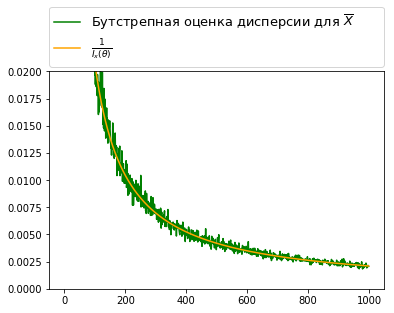

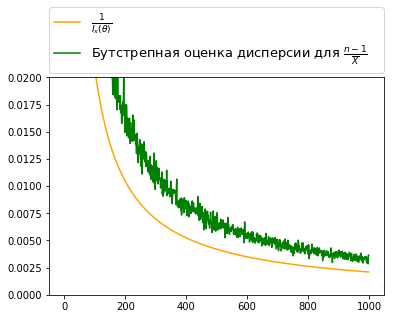

In [129]:
plt.figure()
plt.ylim(0, 0.02)
plt.plot(var_but_eff_est, color='green', 
         label="Бутстрепная оценка дисперсии для $\overline{X}$")
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

plt.figure()
plt.ylim(0, 0.02)
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.plot(var_but_other_est, color='green', 
         label="Бутстрепная оценка дисперсии для $\\frac{n - 1}{\overline{X}}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

### Нормальное распределение

In [117]:
N = 1000
K = 500

sq_scale = 2.1
p_random = RandomParameter()
print("p = ", p_random)

sample = sps.norm.rvs(loc=p_random, scale=sqrt(sq_scale), size=N)

effective_est = np.array([sample[:i].mean() for i in range(1, N + 1)])
other_est = np.array([np.median(sample[:i]) for i in range(1, N + 1)])

var_but_eff_est = np.zeros(N)
var_but_other_est = np.zeros(N)

for i in range(0, N):
    tmp_eff_est = np.zeros(K)
    tmp_other_est = np.zeros(K)
    
    for j in range(0, K):
        sample_but_eff = sps.norm.rvs(loc=effective_est[i], scale=sqrt(sq_scale), 
                                      size=i + 1)
        sample_but_other = sps.norm.rvs(loc=other_est[i], scale=sqrt(sq_scale), 
                                        size=i + 1)
        
        tmp_eff_est[j] = sample_but_eff.mean()
        tmp_other_est[j] = np.median(sample_but_other)
        
    var_but_eff_est[i] = tmp_eff_est.var()
    var_but_other_est[i] = tmp_other_est.var()

fisher = np.array([sq_scale / i for i in range(1, N + 1)])

p =  0.214946567105


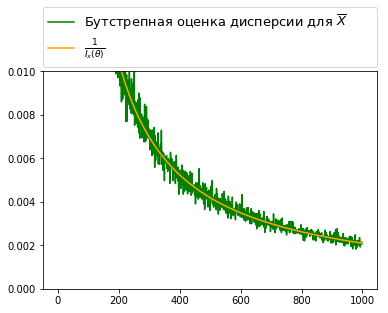

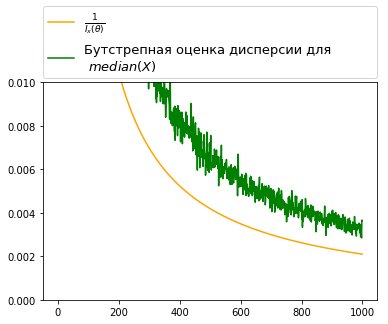

In [132]:
plt.figure()
plt.ylim(0, 0.01)
plt.plot(var_but_eff_est, color='green', 
         label="Бутстрепная оценка дисперсии для $\overline{X}$")
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

plt.figure()
plt.ylim(0, 0.01)
plt.plot(fisher, color='orange', label="$\\frac{1}{I_x(\\theta)}$")
plt.plot(var_but_other_est, color='green', 
         label="Бутстрепная оценка дисперсии для \n $median(X)$")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=1, 
           mode="expand", borderaxespad=0., fontsize=13)
plt.show()

Неравенство Рамео-Крамера выполняется: графики эффективных оценок совпадают с графиком 
$\frac{1}{I_x(\theta)}$, другие оценки располагаются выше.